# Descriptive Statistics for Machine Learning

Descriptive statistics help summarize, understand, and diagnose data **before** applying machine learning models. They provide early signals about stability, outliers, scaling needs, and model suitability.

---

## A. Measures of Central Tendency

Measures of central tendency describe the **typical or representative value** of a dataset.

---

### 1. Mean

$$ \mu = \frac{1}{n}\sum_{i=1}^{n} x_i $$


**What it represents**  
The arithmetic average of all values.

**Key characteristics**
- Uses every data point
- Highly sensitive to outliers

**ML intuition**
- Linear regression estimates the conditional mean.
- Outliers can pull the mean, leading to biased predictions.
- Works best when data is symmetric and outlier-free.

**When to use**
- Normally distributed data
- Noise is Gaussian

---

### 2. Median

**What it represents**  
The middle value when data is sorted.

**Key characteristics**
- Robust to outliers
- Represents the 50th percentile

**ML intuition**
- Median-based models are more robust.
- Absolute-error loss targets the median.
- Useful when distributions are skewed.

**When to use**
- Skewed distributions
- Data with extreme values

---

### 3. Mode

**What it represents**  
The most frequently occurring value.

**Key characteristics**
- Can have multiple modes
- Works for both numeric and categorical data

**ML intuition**
- Useful for categorical features.
- Baseline predictor in classification tasks.

**When to use**
- Nominal or categorical variables
- Class imbalance analysis

---

## B. Measures of Spread

Measures of spread quantify **variability or dispersion** in the data.

---

### 1. Variance

$$ \sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2 $$

**What it represents**  
Average squared deviation from the mean.

**ML intuition**
- High variance indicates noisy or unstable features.
- Affects learning stability and overfitting.

---

### 2. Standard Deviation

$$ \sigma = \sqrt{\sigma^2} $$

**What it represents**  
Spread in the same units as the data.

**ML intuition**
- Used in feature standardization.
- Influences gradient magnitudes during training.

---

### 3. Range

$$ \text{Range} = \max(x) - \min(x) $$

**What it represents**  
Total span of the data.

**ML intuition**
- Extremely sensitive to outliers.
- Rarely used alone in ML preprocessing.

---

### 4. Interquartile Range (IQR)

$$ \text{IQR} = Q_3 - Q_1 $$

**What it represents**  
Spread of the middle 50% of data.

**ML intuition**
- Robust measure of variability.
- Commonly used for outlier detection and filtering.

---

## C. Distribution Shape

Understanding shape helps identify **violations of model assumptions**.

---

### 1. Skewness

Skewness measures **asymmetry** in the distribution.

- Positive skew → long right tail
- Negative skew → long left tail

**ML intuition**
- Skewed features often need transformation (log, sqrt).
- Many ML models assume roughly symmetric data.

**Common examples**
- Income
- Rainfall
- Traffic volume

---

### 2. Kurtosis

Kurtosis measures **tail heaviness**.

- High kurtosis → heavy tails
- Low kurtosis → light tails

**ML intuition**
- Heavy-tailed data produces frequent outliers.
- Gaussian assumptions may fail.
- Robust or tree-based models perform better.

---

## D. Heavy-Tailed Data Intuition

Heavy-tailed distributions occur when **extreme values are common**, not rare.

**Domains**
- Finance (returns, losses)
- Climate (rainfall extremes)
- Network traffic

**ML implications**
- Mean and variance may be unstable.
- Outliers dominate learning.
- Requires robust statistics or transformations.

---

## E. pandas-Based Exploratory Analysis

Common exploratory functions:

```python
df.describe()
```
--------
### Summary statistics
> df.skew()
### Detects asymmetry
> df.kurt()

Detects heavy tails

These are typically the first diagnostics in any ML pipeline.

#### Key ML Takeaways
* Central tendency affects model bias
* Spread affects training stability
* Skewness and kurtosis signal assumption violations
* Descriptive statistics guide preprocessing and model choice


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

np.random.seed(42)
# Base data(normal)
data = np.random.normal(loc = 50, scale = 10, size =10000)
# Add outliers
outliers = np.array([150,160,170])
data_with_outliers = np.concatenate([data,outliers])

df = pd.DataFrame({"feature":data_with_outliers})

### 2. Measure of Central Tendency 



In [4]:
mean_val = df["feature"].mean()
median_val = df["feature"].median()
mode_val = df["feature"].mode()[0]

print("Mean :", mean_val)
print("Median :", median_val)
print("Mode :", mode_val)

Mean : 50.01163667531314
Median : 49.97631083867192
Mode : 10.775997483816575


#### ML intuition
* Mean shifts due to outliers → affects linear regression strongly
* Median stays stable → useful for robust preprocessing
* Mode is best for categorical features (e.g., most common class)

### 3. Measures of Spread

In [7]:
variance = df["feature"].var()
std_dev = df["feature"].std()
data_range = df["feature"].max() - df["feature"].min()
iqr = df["feature"].quantile(0.75) - df["feature"].quantile(0.25)

print("Variance:",variance)
print("Standard Deviation:",std_dev)
print("Range:",data_range)
print("Interquartile Range (IQR):",iqr)

Variance: 104.31306371797996
Standard Deviation: 10.213376704987434
Range: 159.22400251618342
Interquartile Range (IQR): 13.438752142561789


#### ML intuition
* High variance → unstable feature, noisy learning
* Standard deviation → scale used in normalization
* Range → very sensitive to outliers
* IQR → robust spread measure (used in outlier detection)

### 4. Distribution Shape (Skewness and Kurtosis)

In [9]:
skewness = df["feature"].skew()
kurtosis = df["feature"].kurt()

print("Skewness:",skewness)
print("Kurtosis:",kurtosis)

Skewness: 0.3733752997745737
Kurtosis: 3.989946877901823


#### ML intuition
* Skewness

Positive → long right tail (income, rainfall)

Negative → long left tail

* Kurtosis

High → heavy-tailed data

Indicates more extreme values than a normal distribution

Heavy-tailed data often breaks assumptions of:

* Linear regression
* Gaussian-based models

### 5. Visual intuition (important for ML)

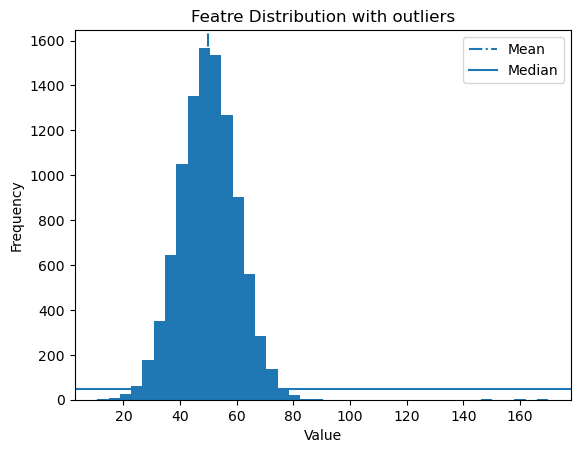

In [10]:
plt.hist(df["feature"],bins = 40)
plt.axvline(mean_val,linestyle = "-.",label = "Mean")
plt.axhline(median_val,linestyle="-",label= "Median")
plt.title("Featre Distribution with outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

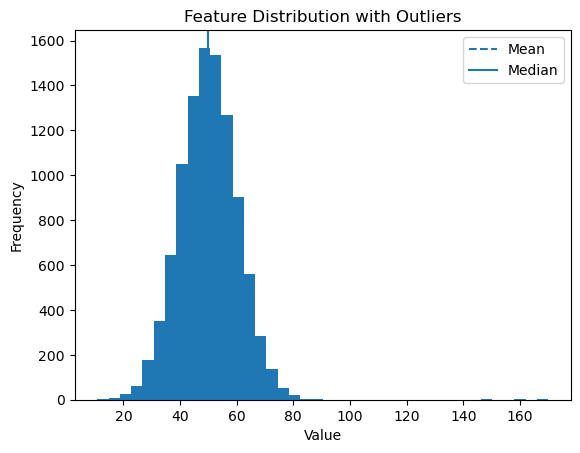

In [11]:
plt.hist(df["feature"], bins=40)
plt.axvline(mean_val, linestyle="--", label="Mean")
plt.axvline(median_val, linestyle="-", label="Median")
plt.title("Feature Distribution with Outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


This plot makes it obvious why:
* Mean shifts
* Median remains stable
* Distribution is right-skewed

### 6. Quick pandas-based practice (ML-style EDA)

In [12]:
df.describe()

,feature
count,10003.000000
mean,50.011637
std,10.213377
min,10.775997
25%,43.275604
50%,49.976311
75%,56.714356
max,170.000000


In [13]:
df.skew()

feature    0.373375
dtype: float64

In [14]:
df.kurt()

feature    3.989947
dtype: float64

These are the first commands used in real ML pipelines before:
* Feature scaling
* Outlier handling
* Model selection

#### Key ML Takeaways
* Central tendency affects model bias
* Spread affects model stability
* Skewness and kurtosis tell you which models will fail
* Always inspect statistics before training